<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/img_processing/img_proc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital image processing

Image processing, pattern recognition and computer graphics are the areas informatics where digital images are used. During image processing a new image is created from the original image. While pattern recognition is used to create vector shapes from images,in this filed artifitial intelligence, machine/deep learning are used. Computer graphics generates the image from the description.

Nowadays images are mostly displayed on raster devices, so the image is a matrix of RGB codes.


##Fields of computing to work witt digital images

![Képi adatok kezelése](https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/english/img_processing/code/img_proc.png)

Mostly we will deal with image processing in the followings, but there will be image processing at the end, too.




---


**WARNING this Jupyter notebook work only in Colab environment without any modification.**

Using your own or other Jupyter notebook service, you have to install some non-standard packages (matplotlib, numpy, opencv, imutils, PIL) which are pre-installed on Colab virtual machine. The *pytesseract* library and the corresponding Python package have to be install on Colab, too.

---



In [8]:
# installing neccessary libraries and import them
!sudo apt install tesseract-ocr  
!pip install pytesseract
import matplotlib.pyplot as plt   # matplotlib for graphical visualization
import numpy as np                # numpy for matrix operations
import cv2                        # opencv library for image processing
import imutils
import pytesseract                # for OCR
import PIL
from skimage import exposure

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


Description: line (0,0) - (10,10)


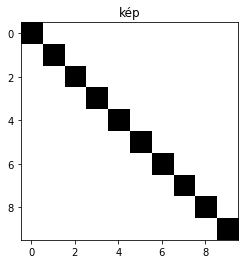

In [9]:
img = 255 - np.eye(10) * 255
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.title('kép')
print('Description: line (0,0) - (10,10)')

**Note** the origin is the upper left corner of the image.

During image processing we create another image from the original one. The aim of this process to get new infromation or hardly visible information from the image. Actually it is a special 2D signal processing.



Digital images are stored on computers as 2D/3D arrays (matrices). Images consist of rows and colomns of pixels. Each pixel stores a coded color information to display at that position. In case of color images mostly RGB codes are used, three values between 0-255. During image processing color images are often converted to grayscale or black and white images. These cases one byte or one bit is enough to store color information.

In [10]:
# download image from GitHub
!wget -q -O sample_data/adalbert.jpg https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/20211022_133458.jpg


There are several free and open source image processing packages for Python language. We'll use mostly OpenCV for processing and Matplotlib to display images, plots.

For those interested, some additional image processing packages are available without claiming to be exhaustive:


*   [PIL/pillow](https://pillow.readthedocs.io/en/stable/) (Python Image Library)
*   [sckikit-image](https://scikit-image.org/)
*   [scipy.ndimage](https://docs.scipy.org/doc/scipy/reference/ndimage.html)
*   [ImageMagick](https://wiki.python.org/moin/ImageMagick)



##Convert color images to grayscale and black and white

The color depth of images are often reduced to make the processing simpler and more effective. 

sizes of color: (1536, 2048, 3), sizes of grayscale: (1536, 2048)
Cut out from grayscale 10 x 15 pixels
[[198 194 198 192 196 202 197 196 187 192 193 185 183 191 195]
 [196 202 196 197 175 202 198 203 190 195 194 186 187 191 187]
 [208 203 199 199 184 193 198 192 188 200 195 198 190 192 191]
 [174 212 200 201 195 197 198 206 201 197 198 187 167 190 200]
 [181 205 200 192 182 199 193 192 195 197 199 199 201 198 185]
 [191 199 201 211 206 198 196 183 184 195 202 204 199 166 141]
 [178 204 202 204 194 194 195 200 198 205 191 164 119 139 159]
 [198 195 196 184 178 204 194 204 202 159 121 107 113 139 163]
 [190 189 188 192 196 207 200 157 121 121 133 138 156 173 176]
 [183 195 195 199 202 166 124 119 124 141 152 172 168 120  89]]


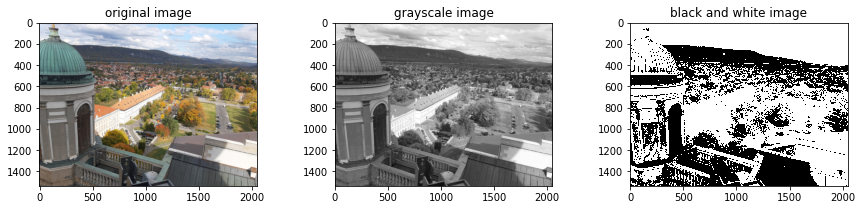

In [11]:
# load image
sample_bgr = cv2.imread('sample_data/adalbert.jpg')
# convert to grayscale, average of R, G, B codes
sample_gray = cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2GRAY)
# black and white from grayscale, 0-th -> 0, th-255 -> 255
th = 100    # threshold
thres, sample_bw = cv2.threshold(sample_gray, th, 255, cv2.THRESH_BINARY)
# plot images
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
ax1.imshow(cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2RGB))
ax1.set_title('original image')
ax2.imshow(sample_gray, cmap='gray')
ax2.set_title('grayscale image')
ax3.imshow(sample_bw, cmap='gray', interpolation='nearest')
ax3.set_title('black and white image')
print(f'sizes of color: {sample_bgr.shape}, sizes of grayscale: {sample_gray.shape}')
print('Cut out from grayscale 10 x 15 pixels')
print(sample_gray[800:810,830:845])

Change the threshold value for black and white conversion (*th* variable in the code) and run the cell again.

###Adaptive threshold
Converting image to black and white using a global threshold often gives unsatisfactory result mostly if sunny and shady parts are present. In these cases adaptive thresholding is more effective, different thresholds are used for smaller parts of the image. 

number of black pixels 390508275 (average), 389532900 (gaussian)


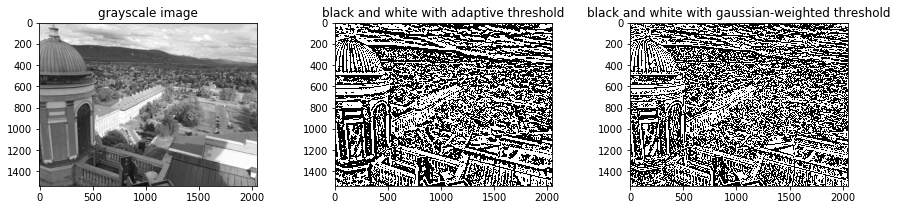

In [12]:
win = 51  # size of subregion for different thresholds
const = 0 # substracted from average
# threshold is the average over the subregions
bw1 = cv2.adaptiveThreshold(sample_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, win, const)
# threshold is the gaussian-weighted average over the subregion
bw2 = cv2.adaptiveThreshold(sample_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, win, const)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
ax1.imshow(sample_gray, cmap='gray')
ax1.set_title('grayscale image')
ax2.imshow(bw1, cmap='gray', interpolation='nearest')
ax2.set_title('black and white with adaptive threshold')
ax3.imshow(bw2, cmap='gray', interpolation='nearest')
ax3.set_title('black and white with gaussian-weighted threshold')
print(f'number of black pixels {np.sum(bw1)} (average), {np.sum(bw2)} (gaussian)')

Change the parameters of adaptive thresholding (*win* and *const* variables). *win* is the size of the subareas, *const* a value to substract from average.

##Convert between different color spaces

There are more different coding metods for color images. RGB is the most-known among these. The value of the red, green and blue channels are stored with a value between 0 and 255. The OpenCV library uses BGR color coding for historical reasons (the order of colors is different). Besides these the HSV (hue, saturation and value) triple is often used. For example, filtering parts of the same color is easier in this color space.

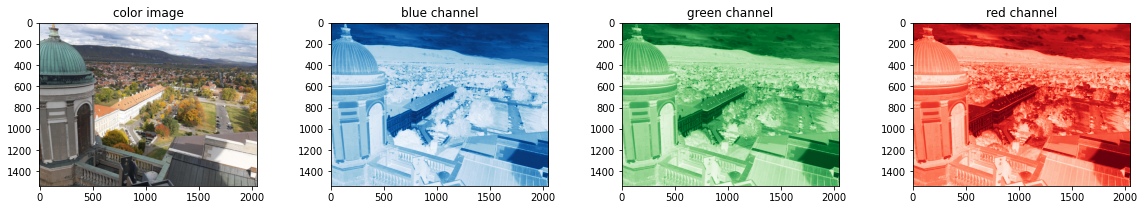

In [13]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 3))
ax1.imshow(cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2RGB))
ax1.set_title('color image')
ax2.imshow(sample_bgr[:,:,0], cmap='Blues')
ax2.set_title('blue channel')
ax3.imshow(sample_bgr[:,:,1], cmap='Greens')
ax3.set_title('green channel')
ax4.imshow(sample_bgr[:,:,2], cmap='Reds')
w = ax4.set_title('red channel')

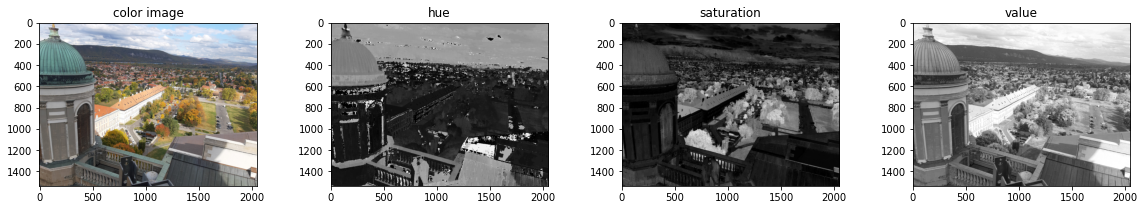

In [14]:
sample_hsv = cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2HSV)  # convert to HSV
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 3))
ax1.imshow(cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2RGB))
ax1.set_title('color image')
ax2.imshow(sample_hsv[:,:,0], cmap='gray')
ax2.set_title('hue')
ax3.imshow(sample_hsv[:,:,1], cmap='gray')
ax3.set_title('saturation')
ax4.imshow(sample_hsv[:,:,2], cmap='gray')
w = ax4.set_title('value')

###Filter by color

Let's try to find the green areas in an image. It is better to start this task in the HSV color space, because it is easier to solve there. Colors can be filtered using hue and saturation values.

![HS értékek](https://i.stack.imgur.com/gyuw4.png)

In the figure, the horizontal axis is hue and the vertical axis is saturation. The green color is in the range of 40-70 and 150-255, respectively.

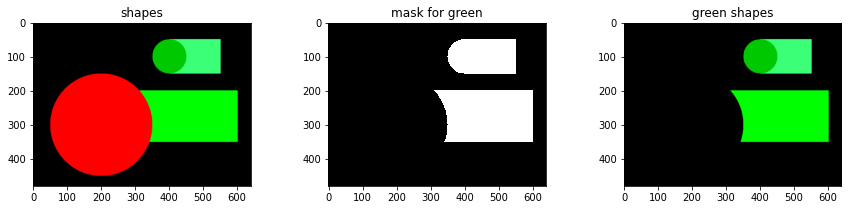

In [15]:
# create image with black background
shapes = np.zeros((480, 640, 3), np.uint8)
# add some shapes
cv2.rectangle(shapes, (150, 200), (600, 350), (0, 255, 0), -1)
cv2.rectangle(shapes, (400, 50), (550, 150), (120, 255, 60), -1)
cv2.circle(shapes, (200, 300), 150, (0, 0, 255), -1)
cv2.circle(shapes, (400, 100), 50, (0, 200, 0), -1)
# BGR -> HSV conversion
shapes_hsv = cv2.cvtColor(shapes, cv2.COLOR_BGR2HSV)
# lower and upper limit for green (HSV)
lower_hsv_roof = np.array([40, 150, 20])
higher_hsv_roof = np.array([70, 255, 255])
mask = cv2.inRange(shapes_hsv, lower_hsv_roof, higher_hsv_roof)
green_shapes = cv2.bitwise_and(shapes, shapes, mask=mask)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
ax1.imshow(cv2.cvtColor(shapes, cv2.COLOR_BGR2RGB))
ax1.set_title('shapes')
ax2.imshow(mask, cmap='gray', interpolation='nearest')
ax2.set_title('mask for green')
ax3.imshow(cv2.cvtColor(green_shapes, cv2.COLOR_BGR2RGB))
w = ax3.set_title('green shapes')

##Contras and brighness

Contrast can be increased by multiplying the pixels by a constant, and brightness can be adjusted by adding a constant. These changes are made uniformly throughout the image and therefore fall into the category of global filters.


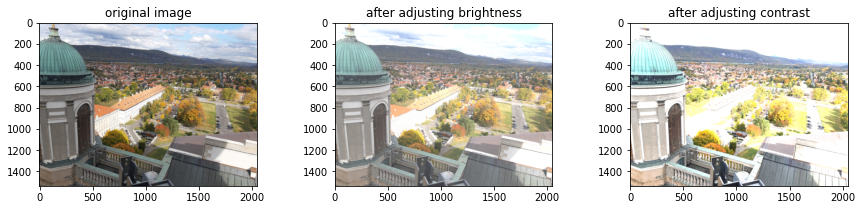

In [16]:
alfa = 2.0   # multiplyer for contrast
beta = 50    # offset for brightness
if beta > 0: # restrict into 0-255 interval
  new_img1 = np.where(sample_bgr > 255 - beta, 255, sample_bgr + beta)
else:
  new_img1 = np.where(sample_bgr > abs(beta), sample_bgr + beta, 0)
if alfa > 1: # restrict into 0-255 interval
  new_img2 = np.where(sample_bgr > 255 // alfa, 255, sample_bgr * alfa).astype('uint8')
else:
  new_img2 = np.clip(sample_bgr * alfa, 0, 255).astype('uint8')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,3))
ax1.imshow(cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2RGB))
ax1.set_title('original image')
ax2.imshow(cv2.cvtColor(new_img1, cv2.COLOR_BGR2RGB))
ax2.set_title('after adjusting brightness')
ax3.imshow(cv2.cvtColor(new_img2, cv2.COLOR_BGR2RGB))
w = ax3.set_title('after adjusting contrast')


##Convolution kernels

Convolution filters can also be used for noise filtering (low-pass filters) and edge enhancement (high-pass filters). During filtering, a square matrix of odd rows of weights is applied to each pixel in the image. The products of the overlaping pixels are summed. For example, a 3x3 matrix with a value of 1/9 in each element will calculate the average of the pixel and the eight pixels around it, i.e. it will smooth (noise filter).

smoothing kernel
[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]
sharpening kernel
[[-1 -1 -1]
 [-1  9 -1]
 [-1 -1 -1]]


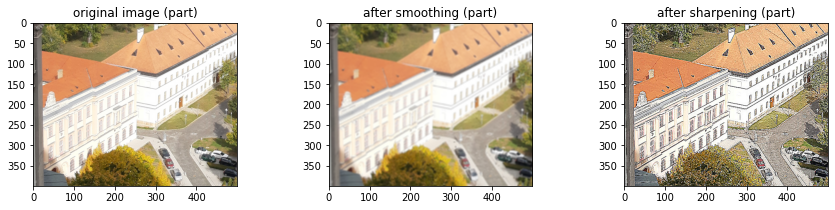

In [17]:
# noise filter (smoothing)
ksize1 = 5       # size kernel
kernel1 = np.full((ksize1, ksize1), 1) / ksize1**2  # sum of weights is 1
blured = cv2.filter2D(sample_bgr, -1, kernel1)
# sharpen filter
kmax = 9       # center item in kernel
ksize2 = 3
kernel2 = np.full((ksize2, ksize2), -1)
kernel2[ksize2 // 2, ksize2 // 2] = kmax
edges = cv2.filter2D(sample_bgr, -1, kernel2)
print('smoothing kernel')
print(kernel1)
print('sharpening kernel')
print(kernel2)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
ax1.imshow(cv2.cvtColor(sample_bgr, cv2.COLOR_BGR2RGB)[700:1100,500:1000,:])
ax1.set_title('original image (part)')
ax2.imshow(cv2.cvtColor(blured, cv2.COLOR_BGR2RGB)[700:1100,500:1000,:])
ax2.set_title('after smoothing (part)')
ax3.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)[700:1100,500:1000,:])
w = ax3.set_title('after sharpening (part)')

Change the parameters of kernels (*ksize1*, *ksize2*, *kmax* variables) and run the cell again.

OpenCV and the other image processing programs have more complex kernels through special functions. Some OpenCV function to give a try:

*   GaussianBlur
*   MedianBlur
*   Sobel
*   ...


##Histogram equalization


The histogram shows the frequency of different shades of color is the image. If the histogram shows that some of the colors are underrepresented, the image quality can be improved by histogram equalization.

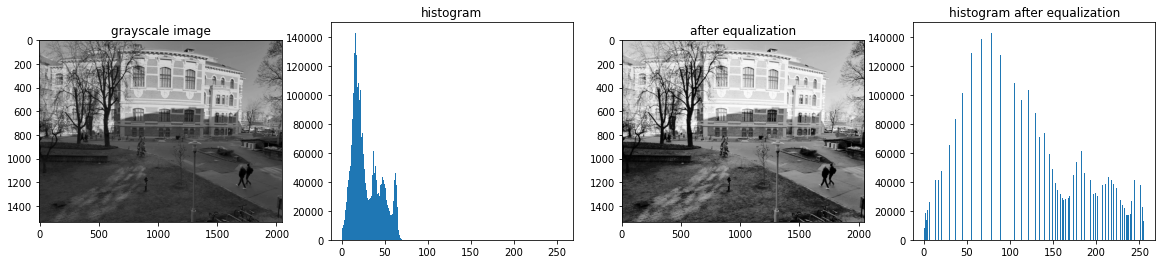

In [20]:
!wget -q -O sample_data/ch.jpg https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/20220224_094651.jpg
test = cv2.imread('sample_data/ch.jpg', cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(test)                          # histogram adjustment
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))
ax1.imshow(test, cmap='gray')
ax1.set_title('grayscale image')
ax2.hist(test.ravel(), 256, [0, 256])
ax2.set_title('histogram')
ax3.imshow(equ, cmap='gray')
ax3.set_title('after equalization')
ax4.hist(equ.ravel(), 256, [0, 256])
w = ax4.set_title('histogram after equalization')

###Histogram matching of images

Orthophptos are usually composed from several images. If the images were taken in different lighting conditions, the images will appear in different colors and the borders of the individual images will be drawn by contrast and brightness differences. We can eliminate this effect by the histogram matching. All channels of the images will be matched to a reference image.

LEt's download a reference image (hm1.jpg) and two other to histogram match (hm2.jpg and hm3.jpg).

In [21]:
!wget -q -O sample_data/hm1.jpg https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/english/img_processing/code/hm1.JPG
!wget -q -O sample_data/hm2.jpg https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/english/img_processing/code/hm2.JPG
!wget -q -O sample_data/hm3.jpg https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/english/img_processing/code/hm3.JPG

Let's display the three images, the reference image was made in sunny weather but the other two are cloudy.

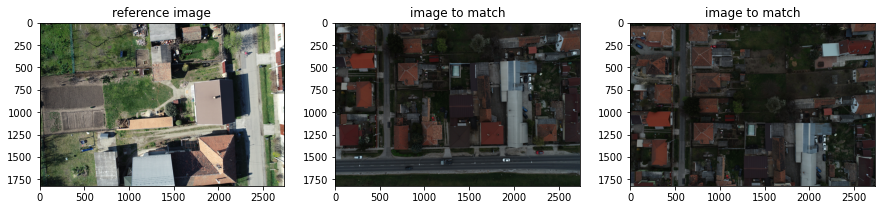

In [22]:
hm1 = cv2.imread('sample_data/hm1.jpg')
hm2 = cv2.imread('sample_data/hm2.jpg')
hm3 = cv2.imread('sample_data/hm3.jpg')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
ax1.imshow(cv2.cvtColor(hm1, cv2.COLOR_BGR2RGB))
ax1.set_title('reference image')
ax2.imshow(cv2.cvtColor(hm2, cv2.COLOR_BGR2RGB))
ax2.set_title('image to match')
ax3.imshow(cv2.cvtColor(hm3, cv2.COLOR_BGR2RGB))
w = ax3.set_title('image to match')

After mathing the histograms the cloud images 

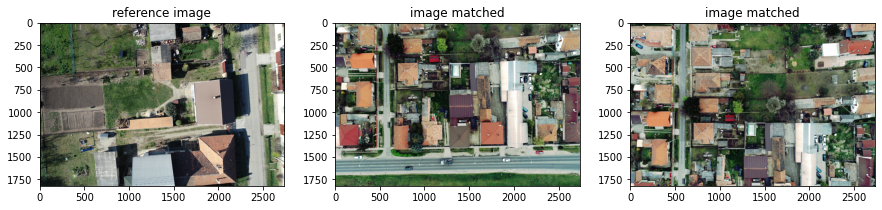

In [23]:
matched2 = exposure.match_histograms(hm2, hm1, multichannel=True)
matched3 = exposure.match_histograms(hm3, hm1, multichannel=True)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))
ax1.imshow(cv2.cvtColor(hm1, cv2.COLOR_BGR2RGB))
ax1.set_title('reference image')
ax2.imshow(cv2.cvtColor(matched2, cv2.COLOR_BGR2RGB))
ax2.set_title('image matched')
ax3.imshow(cv2.cvtColor(matched3, cv2.COLOR_BGR2RGB))
w = ax3.set_title('image matched')

##Line detection in images

Let's download three images for line detection.

In [24]:
!wget -q -O sample_data/kupola.jpg https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/20211022_140346.jpg
!wget -q -O sample_data/mapillary.png https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/mapillary.png
!wget -q -O sample_data/chessboard.png https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/chessboard.png

Images have to be preprocessed before edge detection. 


*   Images are converted to grayscale
*   [Canny](https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html) algorithm applied for edge detection
*   [Hugh](https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html) algorithm is applied to find lines



In [28]:
def LineDetection(kupola, win, const):
  kupola_bw = cv2.adaptiveThreshold(kupola, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, win, const)
  kupola_bw = cv2.bitwise_not(kupola_bw)
  kupola_canny = cv2.Canny(kupola_bw, 100, 255, 3)
  linesP = cv2.HoughLinesP(kupola_canny, 1, np.pi / 180, 50, None, 50, 5)
  line_img = np.zeros(kupola_bw.shape).astype('uint8')
  if linesP is not None:
    for i in range(0, len(linesP)):
      l = linesP[i][0]
      cv2.line(line_img, (l[0], l[1]), (l[2], l[3]), 255, 2)
  fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))
  ax1.imshow(kupola, cmap='gray')
  ax1.set_title('grayscale image')
  ax2.imshow(kupola_bw, cmap='gray')
  ax2.set_title('back and white image')
  ax3.imshow(kupola_canny, cmap='gray')
  ax3.set_title('detected edges')
  ax4.imshow(line_img, cmap='gray')
  ax4.set_title(str(linesP.shape[0]) + 'lines detected')  

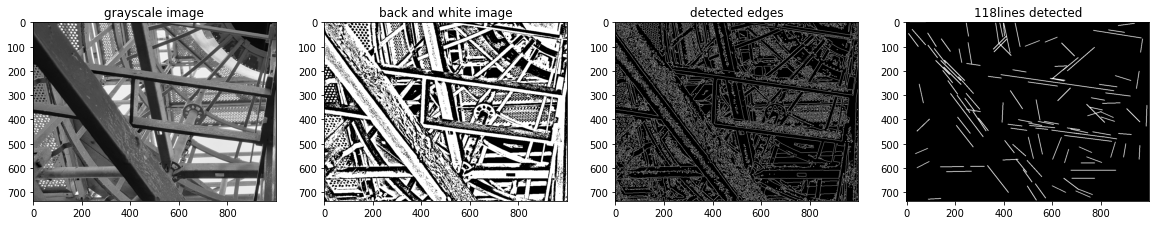

In [29]:
kupola = cv2.imread('sample_data/kupola.jpg', cv2.IMREAD_GRAYSCALE)
win = 51  # width of subregion for adaptive threshold
const = 0 # constant to substract from average
LineDetection(kupola[800:,:1000], win, const) 

Repeat the edge detection on sample_data/mapillari.png image, too. Try to apply global threshold.

Let's make a test on a simpler image.

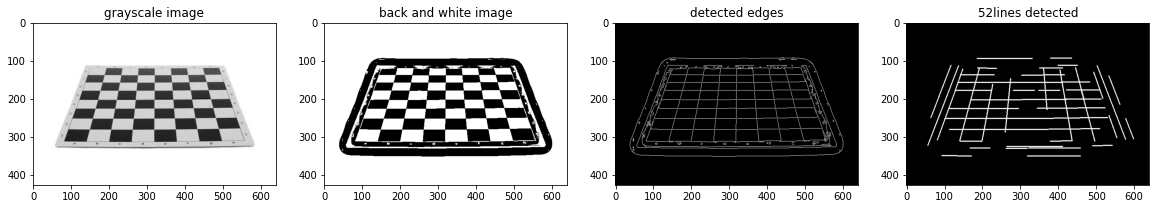

In [30]:
chess = cv2.imread('sample_data/chessboard.png', cv2.IMREAD_GRAYSCALE)
win = 51  # width of subregion for adaptive threshold
const = 0 # constant to substract from average
LineDetection(chess, win, const)

Try to change parameters of line detection.

##Recognition of digits

As part of a complex example, let’s try to recognize digits. We simplify the problem so much that the digits can only consist of straight sections like on the display of calculators.

Let's downlod some sample images.

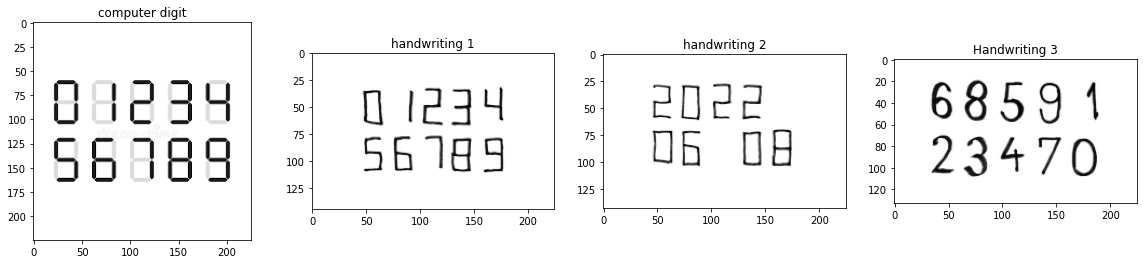

In [31]:
!wget -q -O sample_data/numbers.png https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/numbers.png
nums = cv2.imread('sample_data/numbers.png', cv2.IMREAD_GRAYSCALE)
!wget -q -O sample_data/hand_numbers1.png https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/hand_numbers1.png
nums1 = cv2.imread('sample_data/hand_numbers1.png', cv2.IMREAD_GRAYSCALE)
!wget -q -O sample_data/hand_numbers2.png https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/hand_numbers2.png
nums2 = cv2.imread('sample_data/hand_numbers2.png', cv2.IMREAD_GRAYSCALE)
!wget -q -O sample_data/hand_numbers3.png https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/hand_numbers3.png
nums3 = cv2.imread('sample_data/hand_numbers3.png', cv2.IMREAD_GRAYSCALE)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 4))
ax1.imshow(nums, cmap='gray')
ax1.set_title('computer digit')
ax2.imshow(nums1, cmap='gray')
ax2.set_title('handwriting 1')
ax3.imshow(nums2, cmap='gray')
ax3.set_title('handwriting 2')
ax4.imshow(nums3, cmap='gray')
w = ax4.set_title('Handwriting 3')


###Digit recognition using decision tree

![döntési fa](https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/d_tree1.png)

The decision tree above easy to knock. Do you have idea?

In [32]:
def key_areas(img, rect, tol):
    """ are there white pixels near to the center of the possibly lines?
        img : image to process
        rect: area to examine upper left corner and width and height
        tol: tolerance, the environment of examined points
            p0
        +---+---+
        |       |
     p3 +       + p4
        |   p1  |
        +---+---+
        |       |
     p5 +       + p6
        |   p2  |
        +---+---+
    """
    key_points = []   # empty list for point coordinates
    key_points.append((rect[0] + int(rect[2] / 2), rect[1]))
    key_points.append((rect[0] + int(rect[2] / 2), int(rect[1] + rect[3] / 2)))
    key_points.append((rect[0] + int(rect[2] / 2), rect[1] + rect[3]))
    key_points.append((rect[0], int(rect[1] + rect[3] / 4)))
    key_points.append((rect[0] + rect[2], int(rect[1] + rect[3] / 4)))
    key_points.append((rect[0], int(rect[1] + rect[3] * 3 / 4)))
    key_points.append((rect[0] + rect[2], int(rect[1] + rect[3] * 3 / 4)))
    key_vals = np.zeros(7)  # array of seven elements for result
    for i in range(7):
        # number of white pixel around points
        key_vals[i] = np.sum(img[key_points[i][1]-tol:key_points[i][1]+tol,
                                 key_points[i][0]-tol:key_points[i][0]+tol]) / 255
    return key_vals

In [33]:
def d_tree(w, kv, stat):
    """ decision tree returnd digit depending on key points

        w: width of digit field
        kv: number of white pixels in key areas
        stat: statistics for the area
    """
    num = -1                # unknown digit
    if stat[2] < w / 4:     # narrow
        num = 1
    else:
        n = sum([x > 0 for x in kv])    # number of line segments
        if n == 7:
            num = 8         # all segments with line
        elif n == 6:        # 0/6/9
            if kv[1] == 0:
                num = 0
            elif kv[4] == 0:
                num = 6
            else:
                num = 9
        elif n == 5:        # 2/3/5
            if kv[0] * kv[4] * kv[1] * kv[5] * kv[2] > 0:
                num = 2
            elif kv[0] * kv[4] * kv[1] * kv[6] * kv[2] > 0:
                num = 3
            elif kv[0] * kv[3] * kv[1] * kv[6] * kv[2] > 0:
                num = 5
        elif n == 4 and kv[3] * kv[1] * kv[4] * kv[6] > 0:
            num = 4
        elif n == 3 and kv[0] * kv[4] * kv[6] > 0:
            num = 7
    return num

In [34]:
def digits(nums):
    """ Search for digits in image

        nums: image to process
    """
    # convert to black and white
    thres, nums_bw = cv2.threshold(nums, 127, 255, cv2.THRESH_BINARY)
    sq = np.full((3, 3), 1)                 # quadratic mask dilate

    nums_bw = cv2.bitwise_not(nums_bw)      # kép invertálása
    # dilate to fill gaps
    nums_dilated = cv2.dilate(nums_bw, sq, iterations=2)
    # thinning (skeleton)
    nums_thin = cv2.ximgproc.thinning(nums_dilated)
    # releated parts
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(nums_thin, 8)
    limg = np.zeros(nums_bw.shape)  # empty (black) image
    w, h = np.median(stats[:, 2:4], axis=0)  # median for width and height
    for i in range(1, num_labels):  # skip first, it is the background
        # display extent and centroid
        cv2.rectangle(limg, (stats[i][0], stats[i][1]),
                      (stats[i][0]+stats[i][2], stats[i][1]+stats[i][3]), 255, 1)
        cv2.circle(limg, (int(centroids[i][0]), int(centroids[i][1])), 2, 255)
        if stats[i][3] < h * 2 / 3 or stats[i][3] > h * 4 / 3:     # height oK?
            continue
        # key for check
        kv = key_areas(nums_thin, stats[i], max(int(w / 6), 1))
        # decision tree
        num = d_tree(w, kv, stats[i])
        # digit as annotation
        cv2.putText(limg, str(num),
                    (int(centroids[i][0]), int(centroids[i][1])),
                    cv2.FONT_HERSHEY_SIMPLEX, max(int(w / 30), 0.5), 255)
    fig, ax = plt.subplots(1, 4, figsize=(20, 4))
    ax[0].imshow(nums_bw, cmap='gray')
    ax[0].set_title('original image')
    ax[1].imshow(nums_dilated, cmap='gray')
    ax[1].set_title('dilated lines')
    ax[2].imshow(nums_thin, cmap='gray')
    ax[2].set_title('thinned lines')
    ax[3].imshow(limg, cmap='gray')
    ax[3].set_title('digits found')

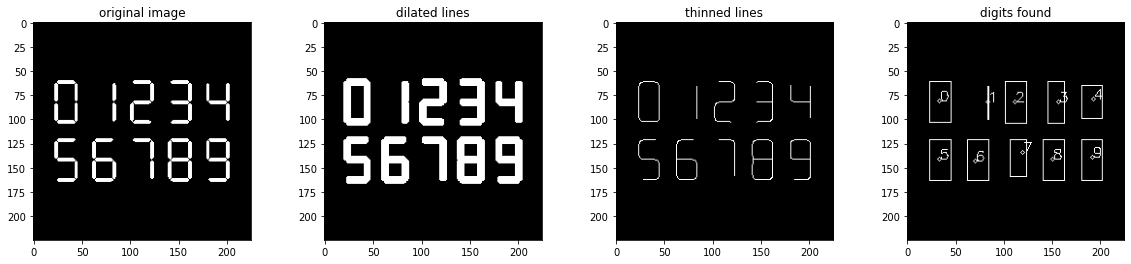

In [35]:
digits(nums)

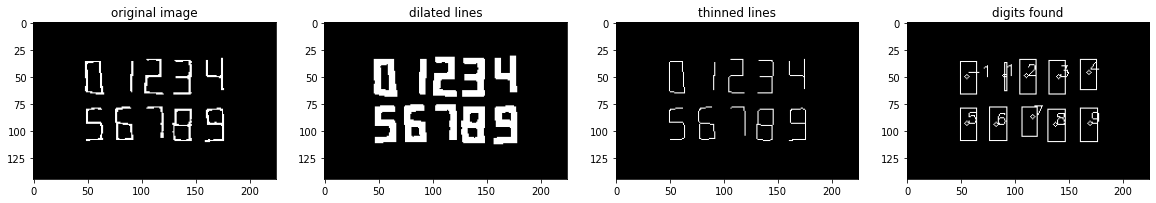

In [36]:
digits(nums1)

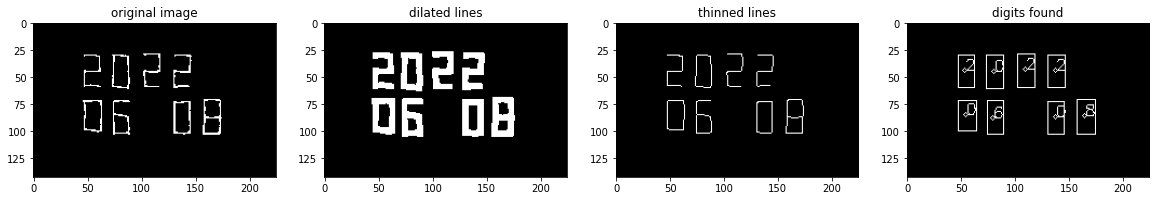

In [37]:
digits(nums2)

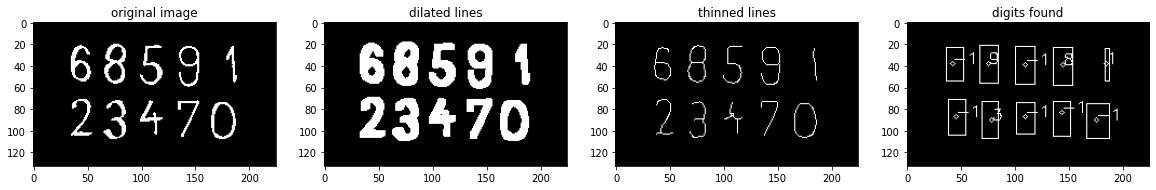

In [38]:
digits(nums3)

Test the program with your handwriting.

How colud you improve the program to recognise digits with curves?

##Recognise license plate number

License plate recognition systems can be found every day on highways, in underground garages, etc. The following solution uses a ready-made character recognition (OCR) procedure. The basic condition for this is that we can separate the part containing the text from the rest of the image. Thus, our solution can be divided into two parts. We first look for the convex rectangular shapes in the image, and then we try to recognize the possible text within it.

Google *tesseract* uses neural networks in the solution.

In [39]:
# download image
!wget -q -O sample_data/plate1.png https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/plate1.png

It is assumed that the license plate is surrounded by a frame that contrasts with the other parts.

In [40]:
def plate(gray, thres1, thres2):
  """ search for framed text in the image """
  orig = gray.copy()
  edged = cv2.Canny(gray, thres1, thres2) # edge detection
  # search for closed areas, keep larger ones
  cnts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10] # first ten areas by size
  for c in cnts:
    # smooth outline
    peri = cv2.arcLength(c, True)
    screenCnt = cv2.approxPolyDP(c, 0.018 * peri, True)
    a1 = cv2.contourArea(screenCnt)
    a2 = cv2.contourArea(cv2.convexHull(screenCnt))
    if len(screenCnt) == 4 and 0.9 < a1 / a2 < 1.1:    # outline has four corners and convex?
      # mask for plate
      mask = np.zeros(gray.shape, np.uint8)            # fill with black
      cv2.drawContours(mask, [screenCnt], 0, 255, -1)  # filled outline added to mask
      (x, y) = np.where(mask == 255)                   # white pixels
      (topx, topy) = (np.min(x), np.min(y))            # boundary rectangle
      (bottomx, bottomy) = (np.max(x), np.max(y))
      cropped = gray[topx:bottomx+1, topy:bottomy+1]   # cut from the image
      text = pytesseract.image_to_string(cropped, config='--psm 11')   # read plate number
      text = text.strip('\n\r\f')                      # trim EOL characters 
      if len(text) > 0:
        print(topx, topy, bottomx, bottomy, text)
        cv2.polylines(orig, [screenCnt], True, 255, 10) # draw outline
  fig, ax = plt.subplots(1, 3, figsize=(15, 4))
  ax[0].imshow(gray, cmap='gray')
  ax[0].set_title('smoothed image')
  ax[1].imshow(edged, cmap='gray')
  ax[1].set_title('edge detection')
  ax[2].imshow(orig, cmap='gray')
  ax[2].set_title('found texts')

In [41]:
gray = cv2.imread('sample_data/plate1.png', cv2.IMREAD_GRAYSCALE)
plate(gray, 100, 255)

AttributeError: ignored

In [42]:
!wget -q -O sample_data/plate2.png https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/plate2.png
gray1 = cv2.imread('sample_data/plate2.png', cv2.IMREAD_GRAYSCALE)
plate(gray1, 100, 250)

AttributeError: ignored

Used sources:


1.  https://github.com/OSGeoLabBp/tutorials/blob/master/hungarian/python/python3_oktato.rst
2.  https://www.tutorialspoint.com/dip/image_processing_introduction.htm
3.  https://docs.opencv.org/3.4/d6/d00/tutorial_py_root.html
4.  https://medium.com/swlh/image-processing-with-python-connected-components-and-region-labeling-3eef1864b951
5.  https://circuitdigest.com/microcontroller-projects/license-plate-recognition-using-raspberry-pi-and-opencv
6.  https://bhadreshpsavani.medium.com/how-to-use-tesseract-library-for-ocr-in-google-colab-notebook-5da5470e4fe0
8.  https://medium.com/@gowtham180502/how-to-detect-colors-using-opencv-python-98aa0241e713
9.  https://towardsdatascience.com/scene-text-detection-and-recognition-using-east-and-tesseract-6f07c249f5de